# Loading data from CSV file and reading the first 5 row

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [8]:
df = pd.read_csv(r"C:\catastrophic.csv")
df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Religion,Ethnic Group,Geo Zone,Children in Household?,Older Person in Household?,...,Ease of Paying Bills?,Borrowed for Bills?,Suspended Projects for Bills?,Stopped School for Bills?,Outcome Affected by Unpaid Bills?,Public Shame from Bills?,Mental Stress from Bills?,Financial Impact of Bills?,Last Admission Cost?,6-Month Health Spending Estimate
0,37,Male,Married,Tertiary,Employed,Islam,Ebira,Kogi East,Yes,No,...,Very easy,No,No,No,No,No,No,No,"3,500.00","8,000.00"
1,36,Male,Married,Tertiary,Unemploy,Christia,Igala,Kogi West,Yes,Yes,...,Not easy,No,Yes,No,No,No,No,No,"10,800.00","200,000.00"
2,42,Male,Married,Tertiary,Employed,Christia,Others,Kogi West,Yes,No,...,Very easy,No,No,No,No,No,No,No,"10,000.00","100,000.00"
3,32,Female,Married,Tertiary,Employed,Islam,Igala,Kogi Central,Yes,No,...,Somehow easy,No,No,No,No,No,No,No,"25,000.00","20,000.00"
4,47,Male,Married,Tertiary,Employed,Christia,Igala,Kogi West,Yes,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,"20,000.00","50,000.00"


# Reading the column header information

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 403 non-null    int64 
 1   Gender                              403 non-null    object
 2   Marital Status                      403 non-null    object
 3   Education Level                     403 non-null    object
 4   Employment Status                   403 non-null    object
 5   Religion                            403 non-null    object
 6   Ethnic Group                        403 non-null    object
 7   Geo Zone                            403 non-null    object
 8   Children in Household?              403 non-null    object
 9   Older Person in Household?          403 non-null    object
 10  Use Insecticide Net?                403 non-null    object
 11  Residence Type                      403 non-null    object

# Descriptive & Diagnostic Metrics

Frequency distribution for Gender:
   Gender  Count
0    Male    216
1  Female    187 



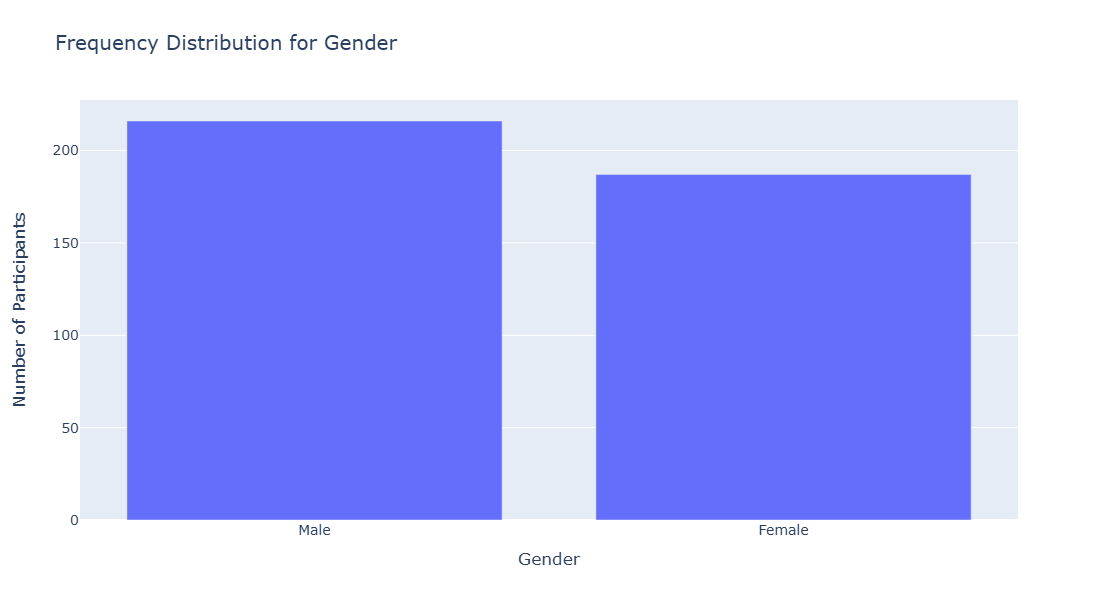

Frequency distribution for Marital Status:
  Marital Status  Count
0        Married    262
1         Single    136
2        Widowed      5 



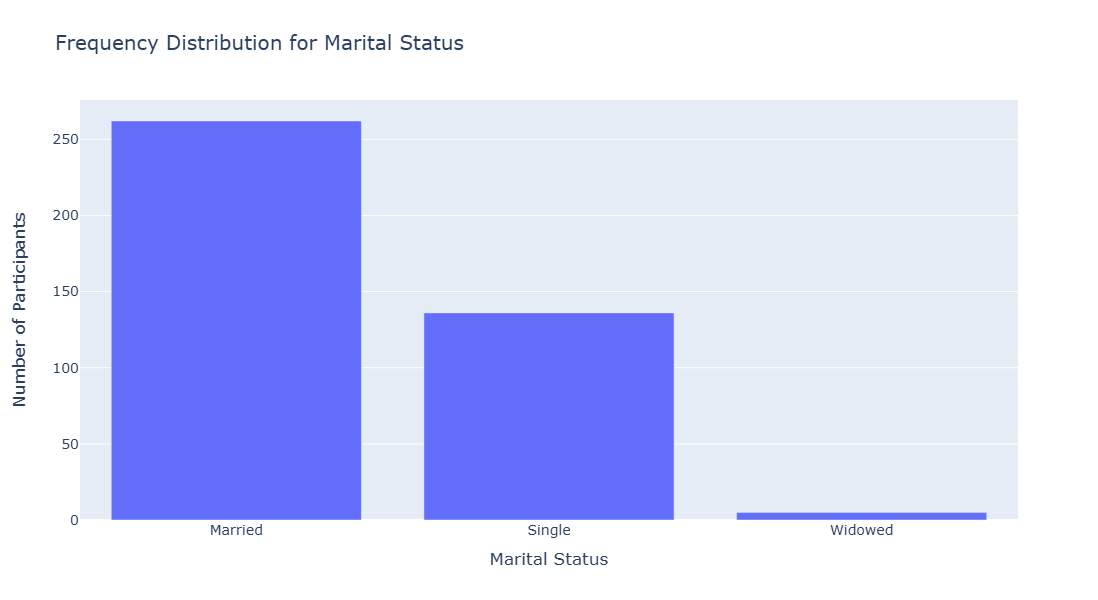

Frequency distribution for Education Level:
  Education Level  Count
0        Tertiary    397
1        Secondar      6 



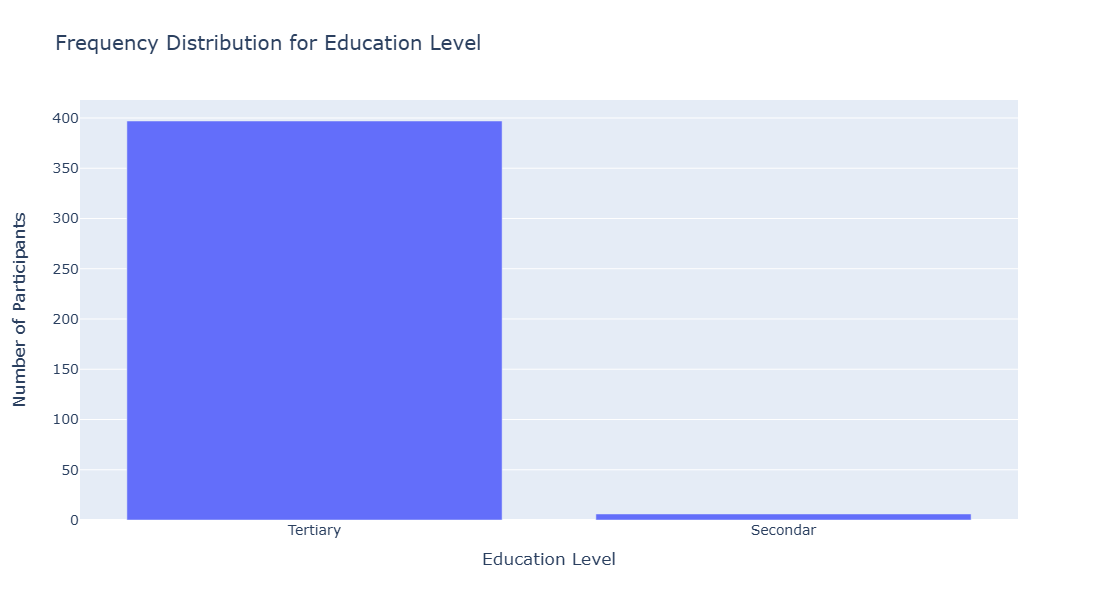

Frequency distribution for Employment Status:
  Employment Status  Count
0          Employed    307
1          Unemploy     96 



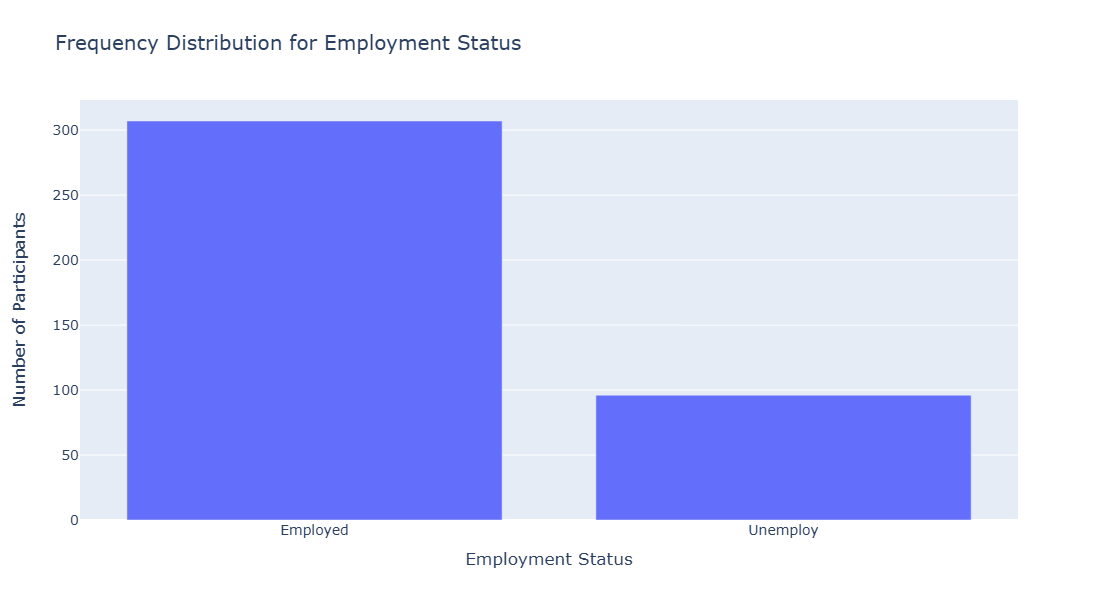

Frequency distribution for Religion:
   Religion  Count
0  Christia    302
1     Islam    101 



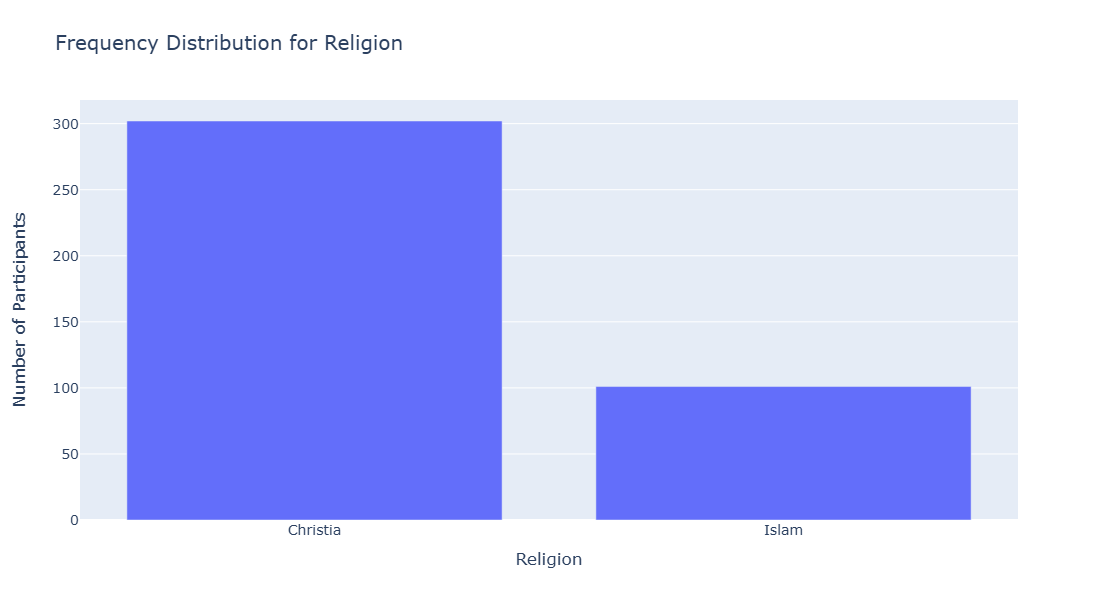

Frequency distribution for Ethnic Group:
  Ethnic Group  Count
0        Igala    217
1       Yoruba     89
2        Ebira     58
3       Others     39 



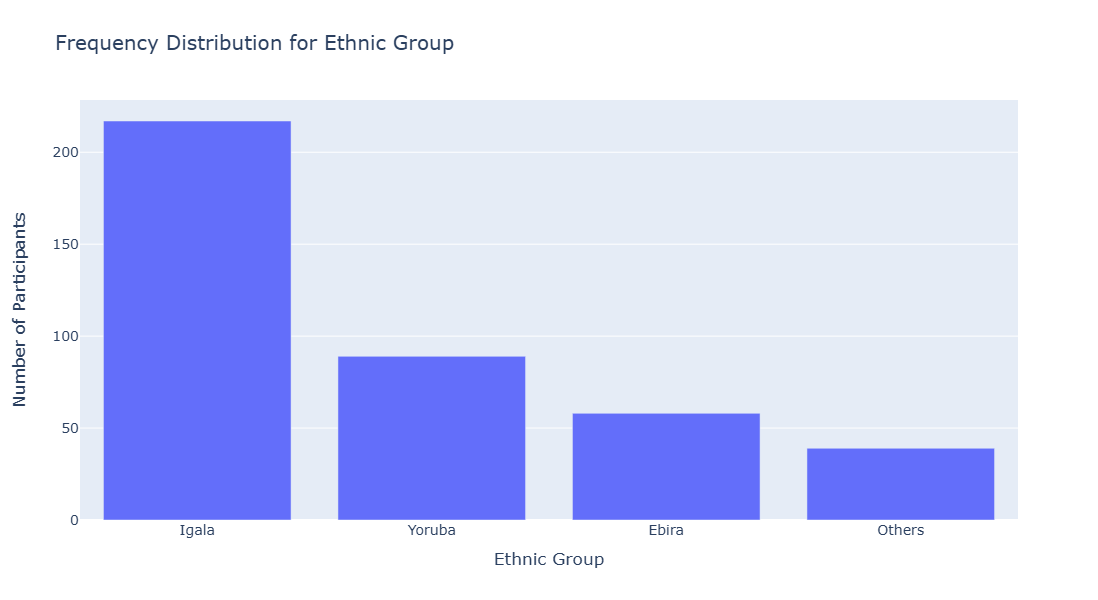

Frequency distribution for Geo Zone:
       Geo Zone  Count
0     Kogi West    255
1     Kogi East     87
2  Kogi Central     61 



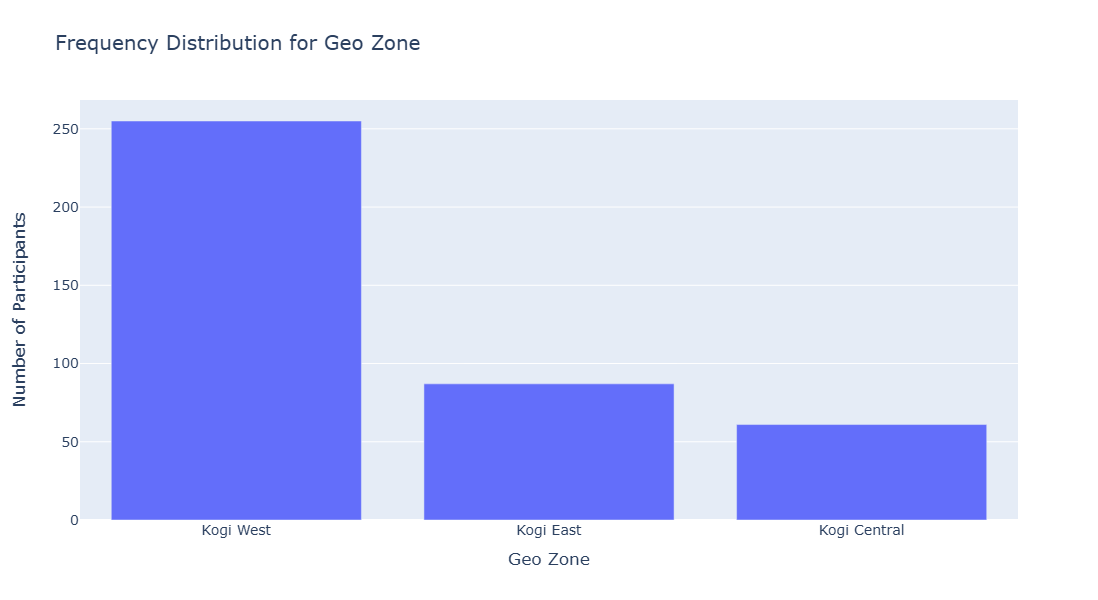

Frequency distribution for Children in Household?:
  Children in Household?  Count
0                    Yes    297
1                     No    106 



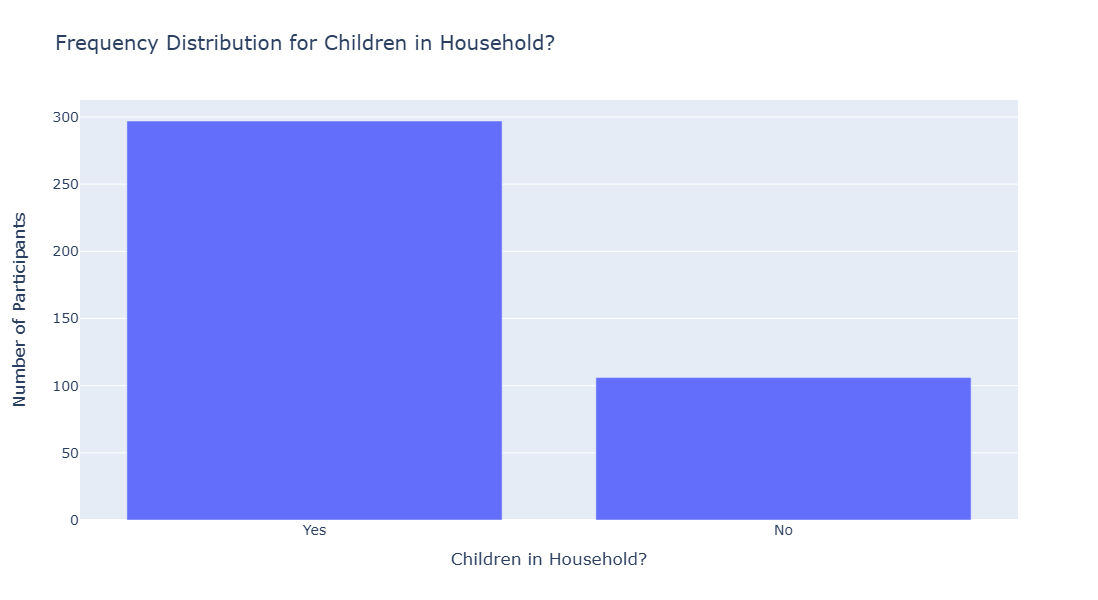

Frequency distribution for Older Person in Household?:
  Older Person in Household?  Count
0                        Yes    298
1                         No    105 



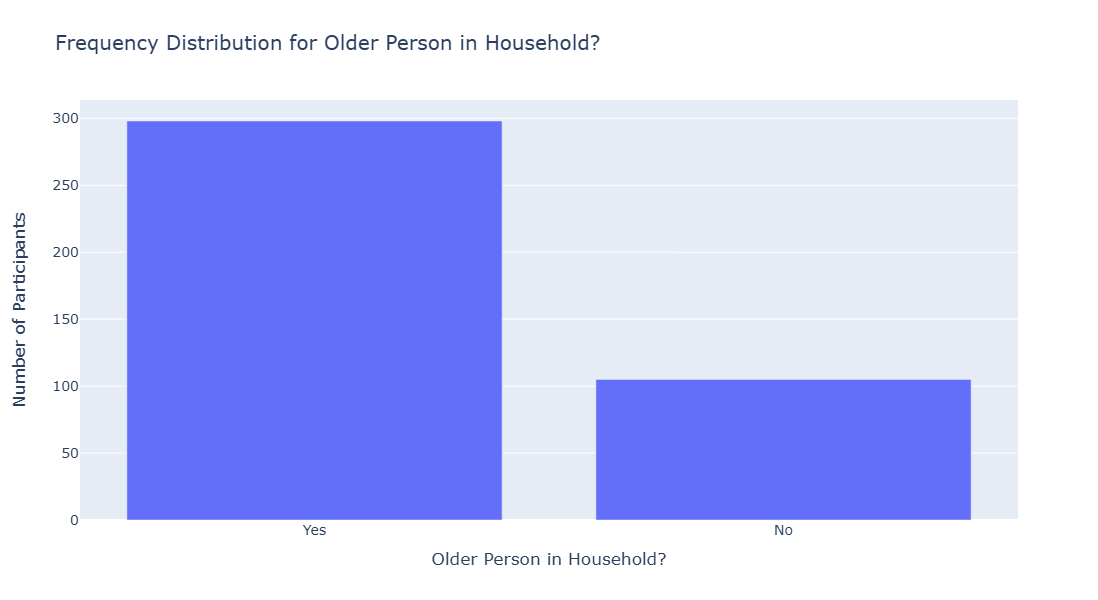

In [206]:
import pandas as pd
import plotly.express as px

# Load data from CSV file
file_path = r"C:\catastrophic.csv"
df = pd.read_csv(file_path)

# Define a list of demographic columns to analyze
demographic_cols = [
    "Gender",
    "Marital Status",
    "Education Level",
    "Employment Status",
    "Religion",
    "Ethnic Group",
    "Geo Zone",
    "Children in Household?",
    "Older Person in Household?"
]

# Loop through each demographic column, create frequency table and plot
for col in demographic_cols:
    if col in df.columns:
        # Calculate frequency distribution
        freq_table = df[col].value_counts().reset_index()
        freq_table.columns = [col, "Count"]
        
        # Print the frequency table
        print(f"Frequency distribution for {col}:")
        print(freq_table, "\n")
        
        # Create an interactive bar chart using Plotly Express
        fig = px.bar(freq_table, x=col, y="Count", 
                     title=f"Frequency Distribution for {col}",
                     labels={col: col, "Count": "Number of Participants"})
        fig.update_layout(width=800, height=600, font=dict(size=14))
        fig.show()

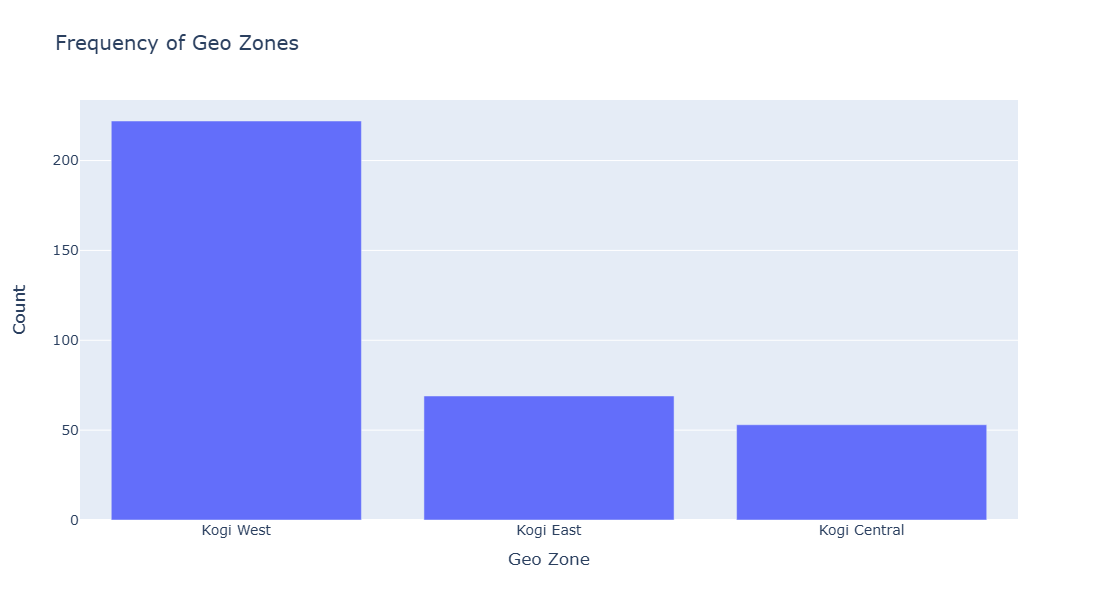

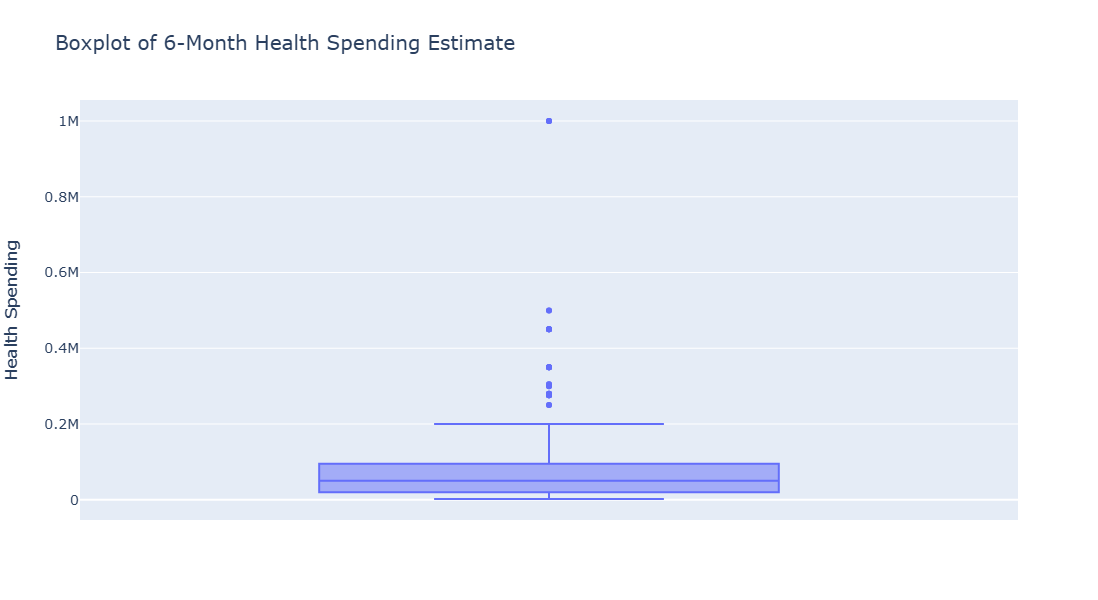

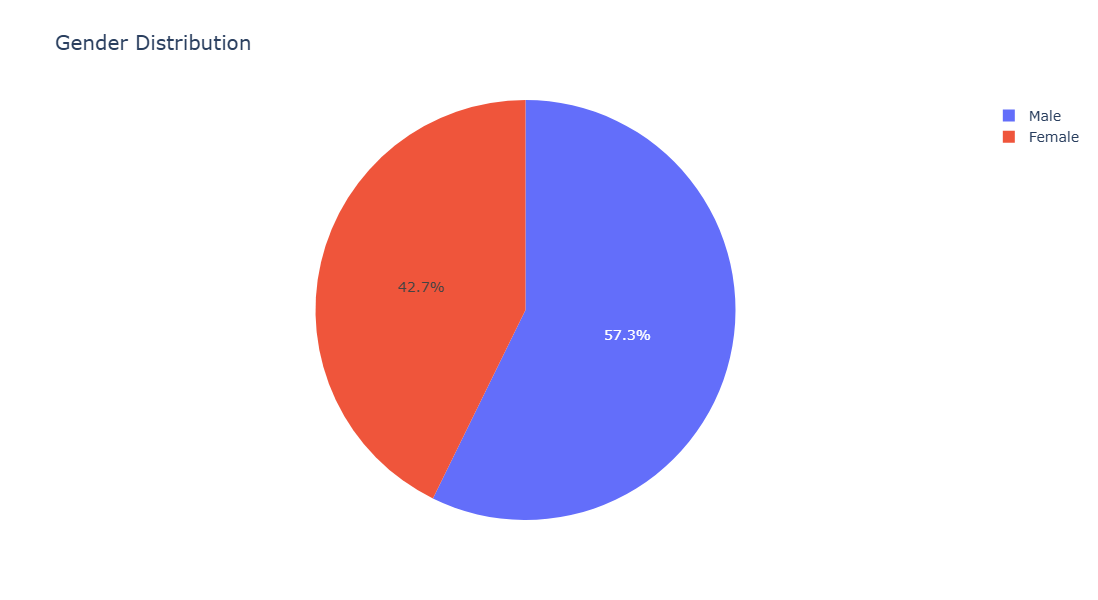

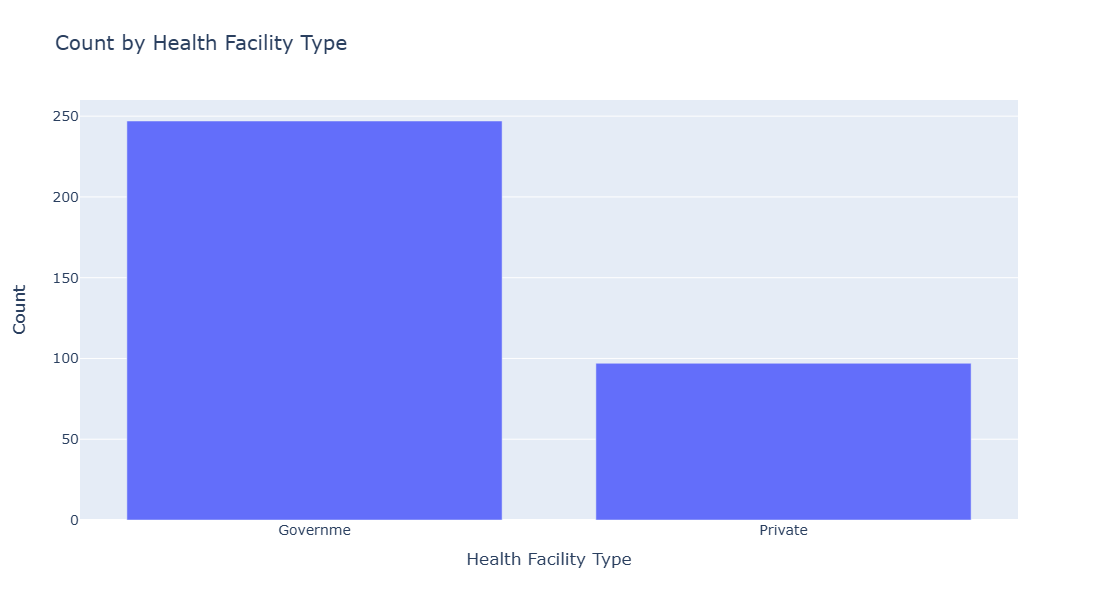

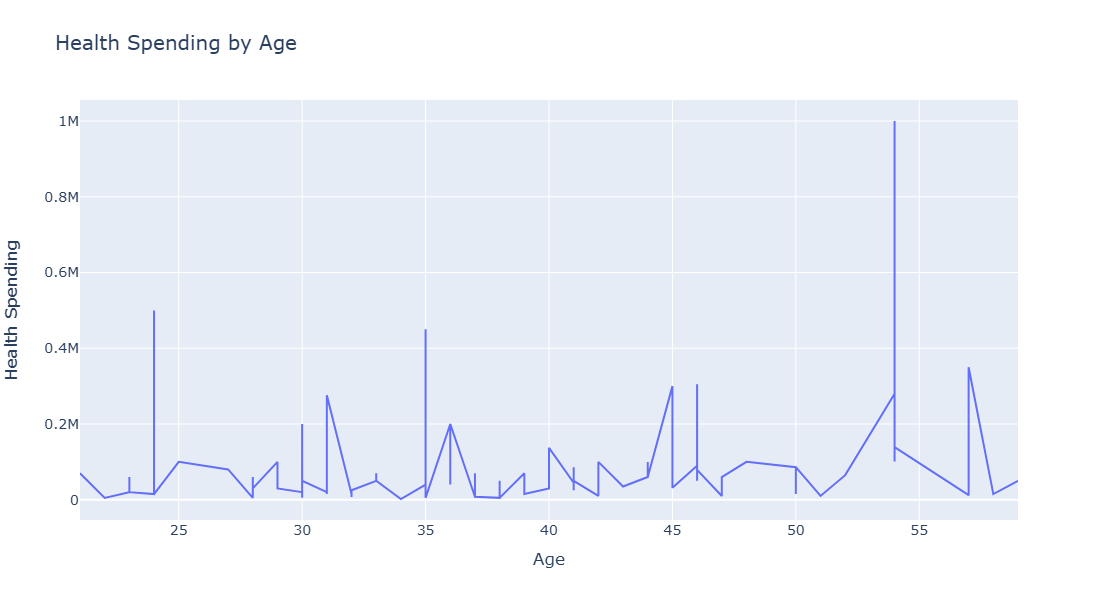

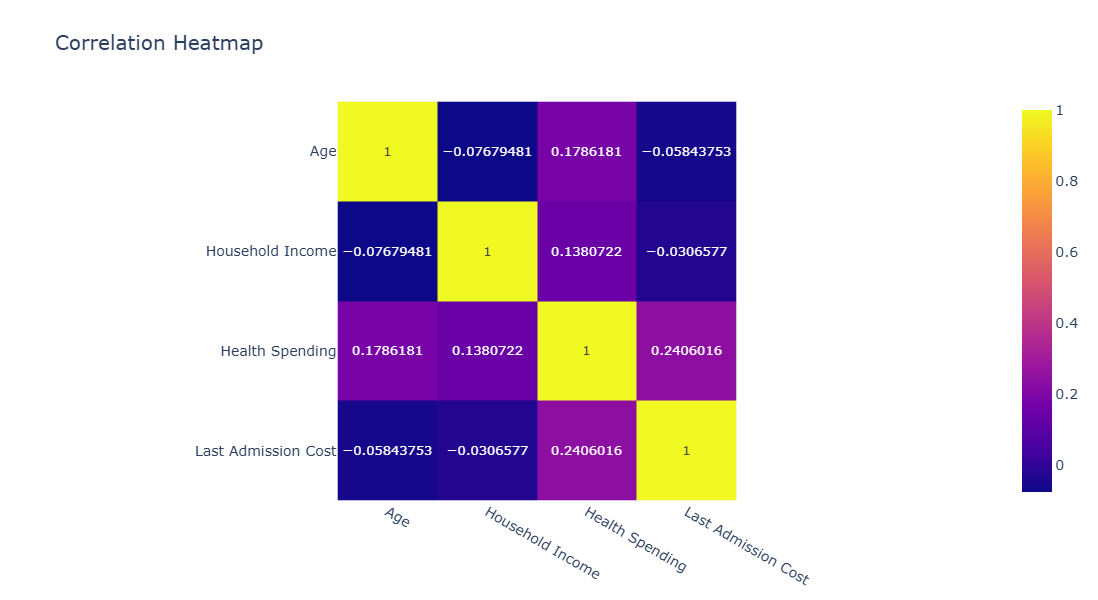

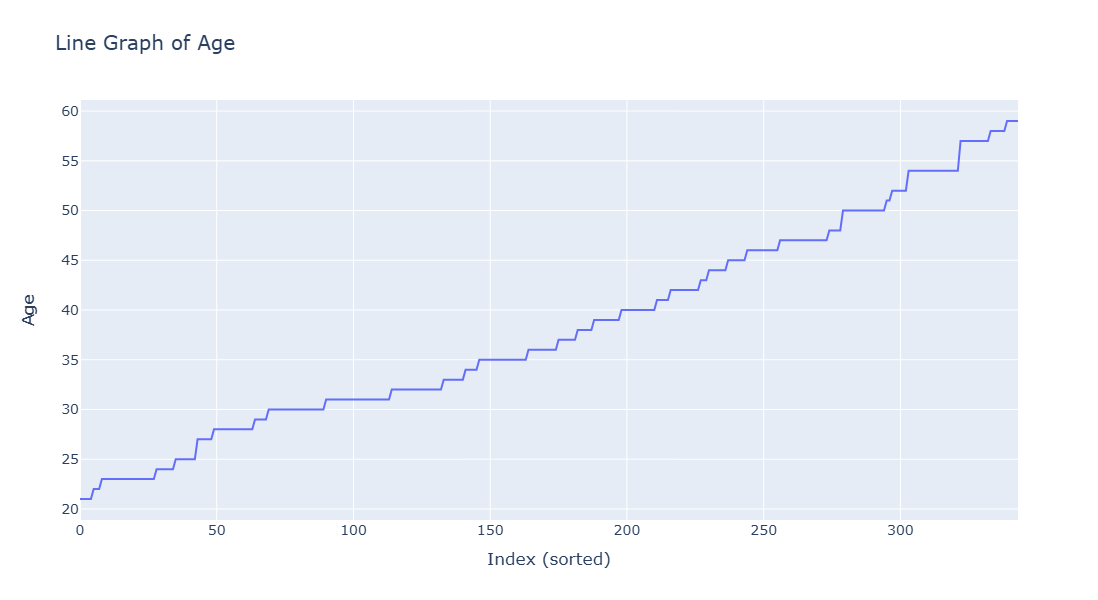

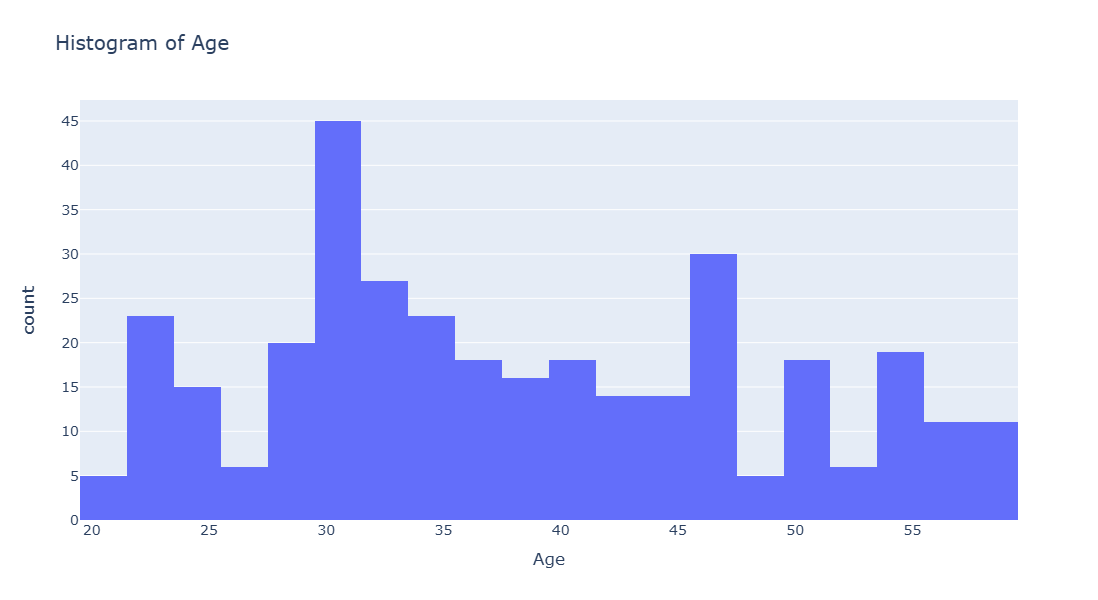

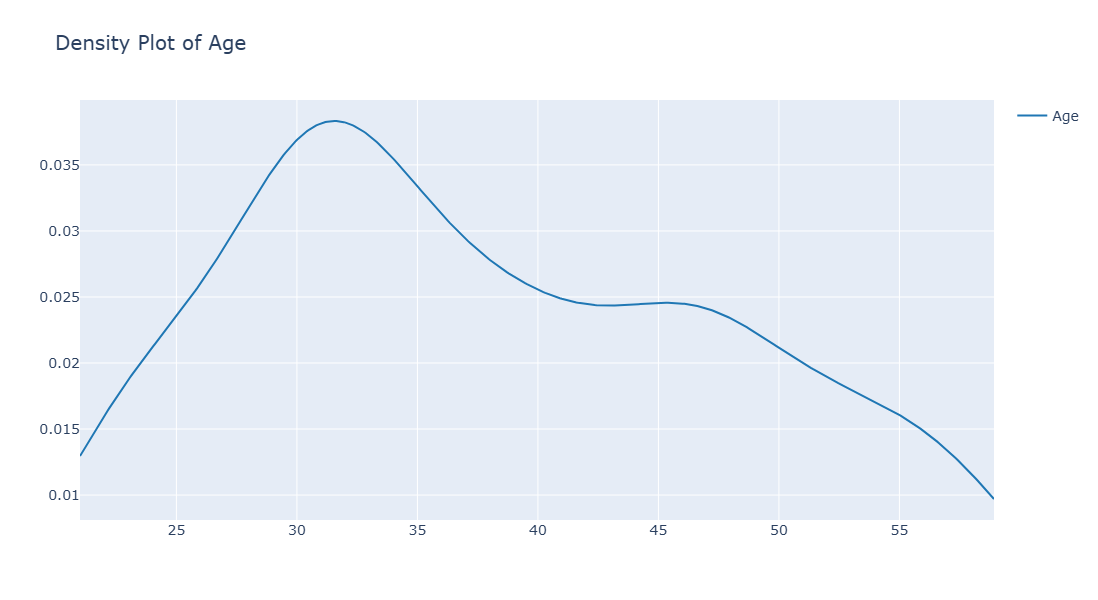

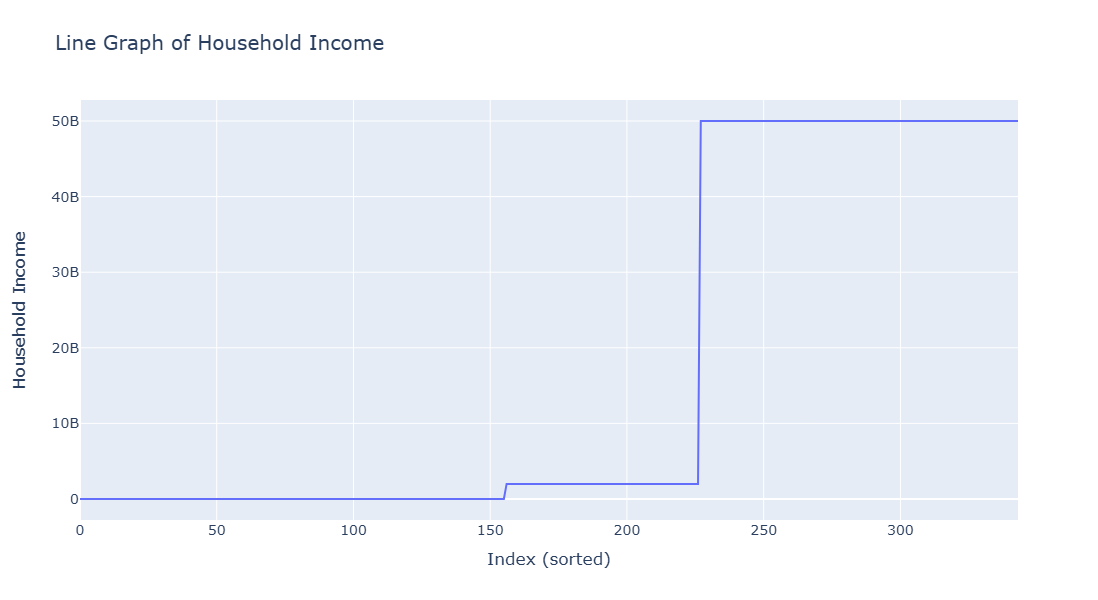

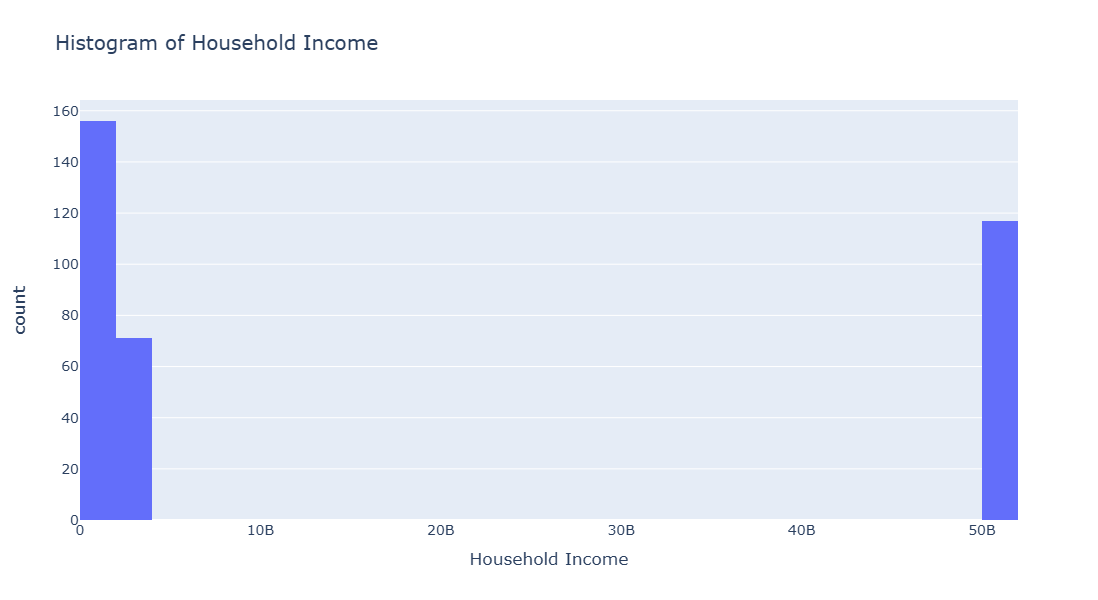

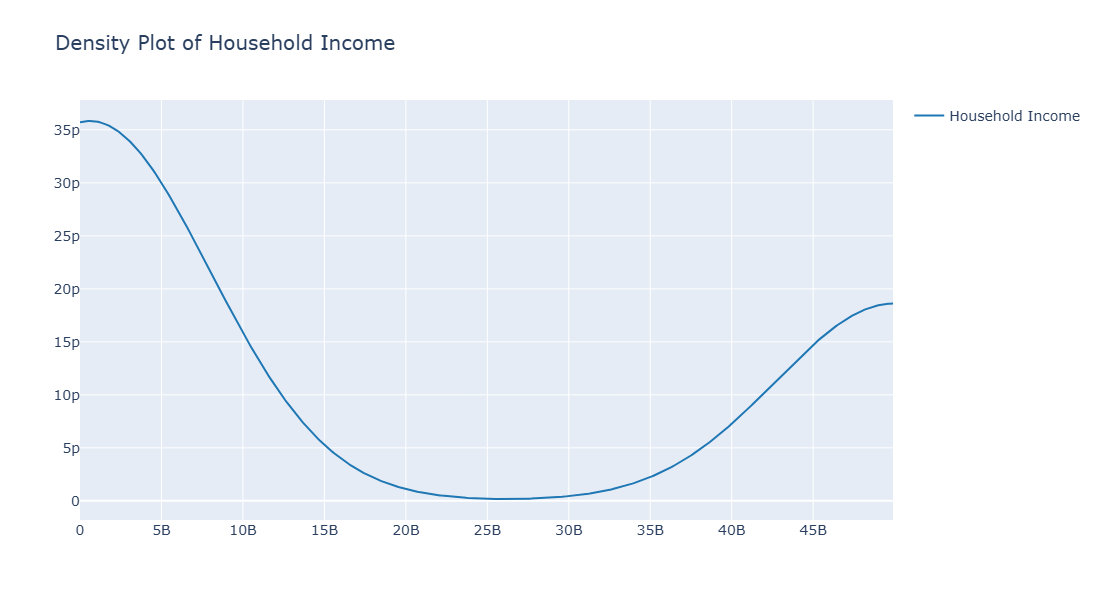

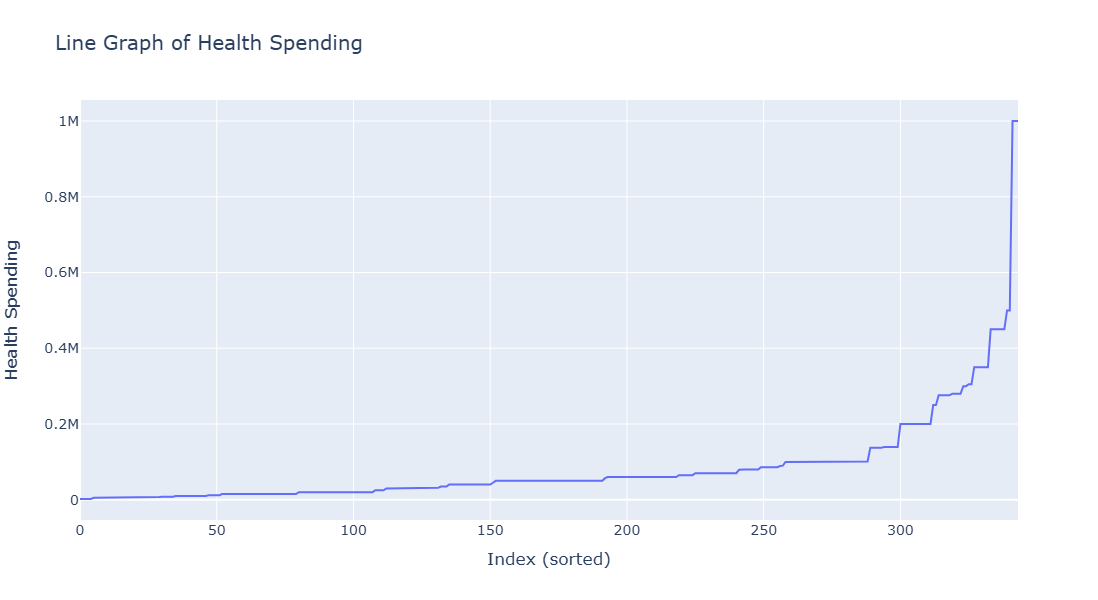

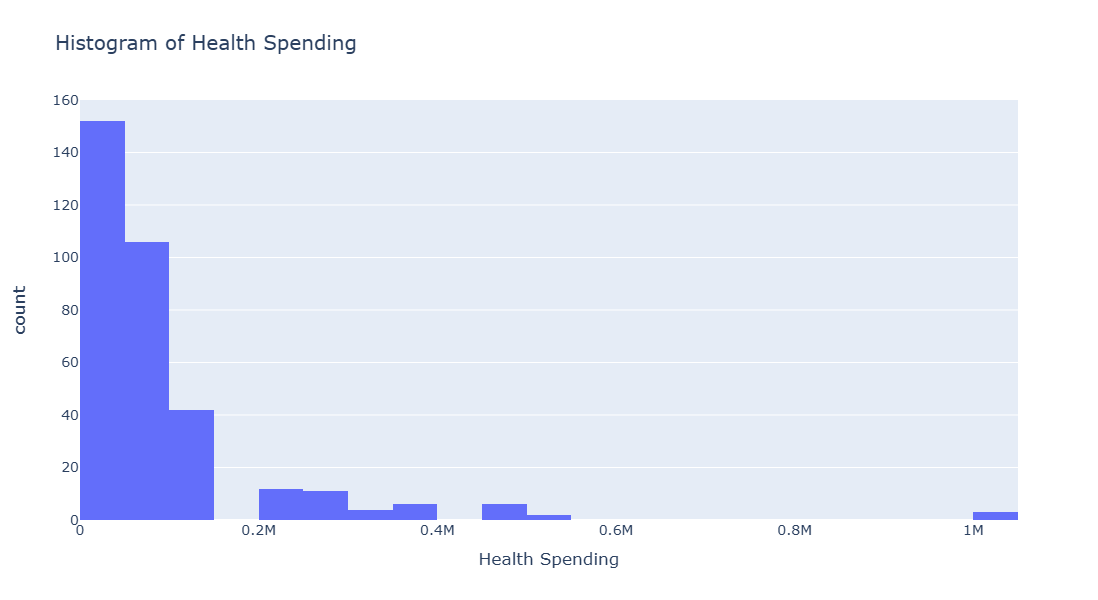

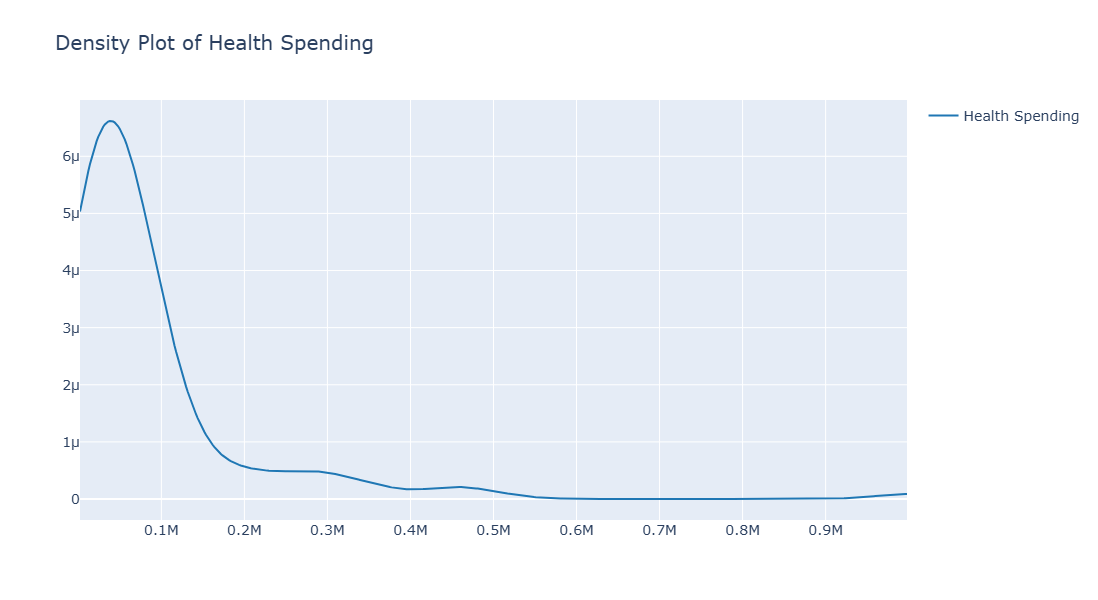

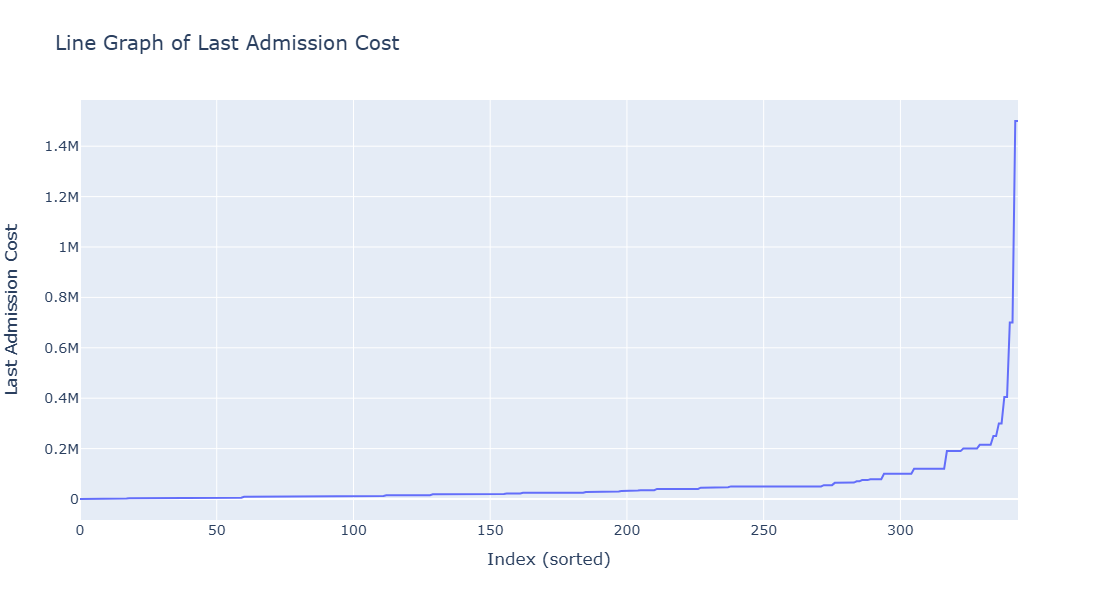

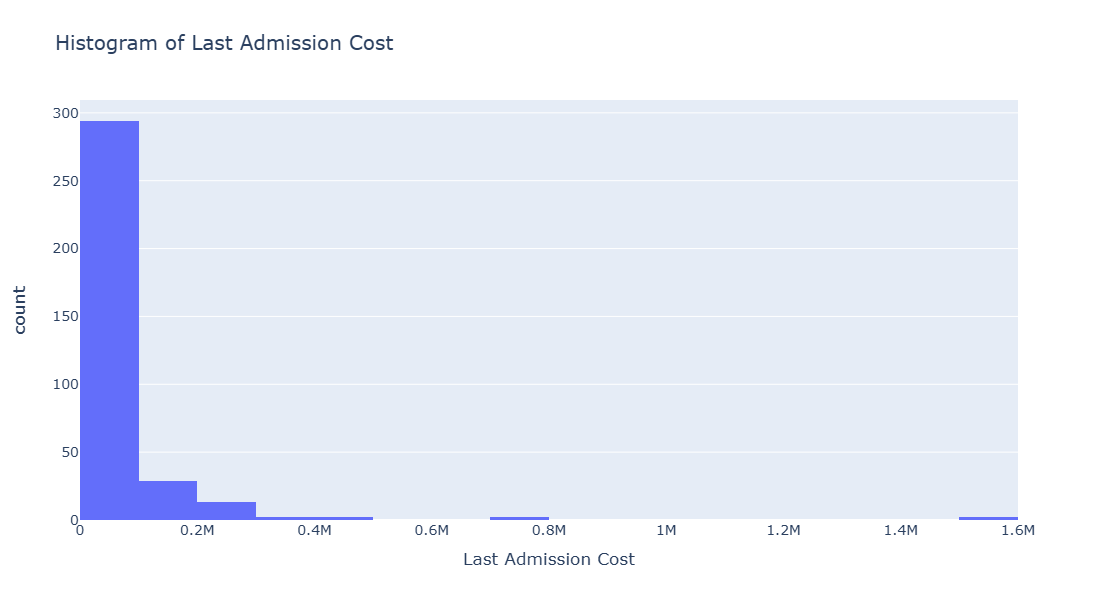

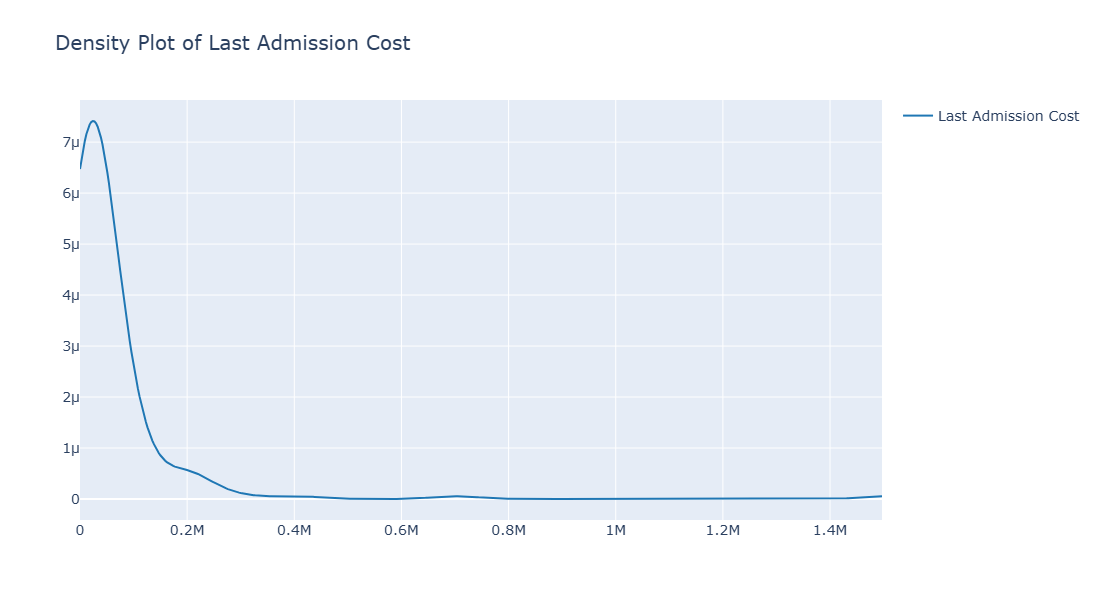

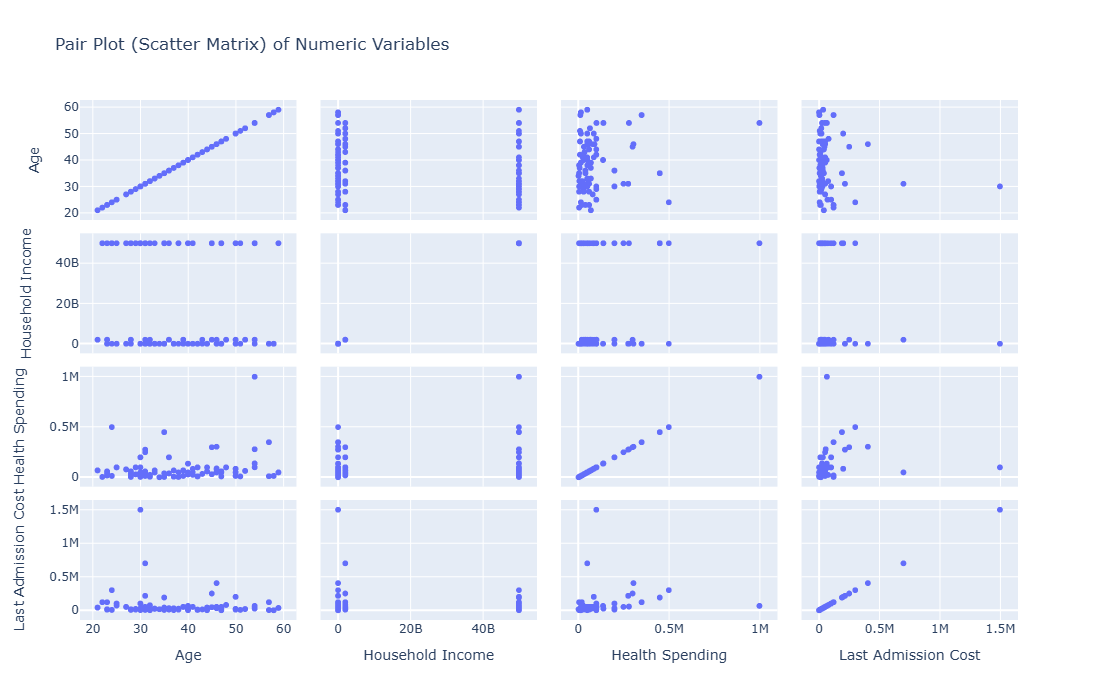

C:\Anaconda\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



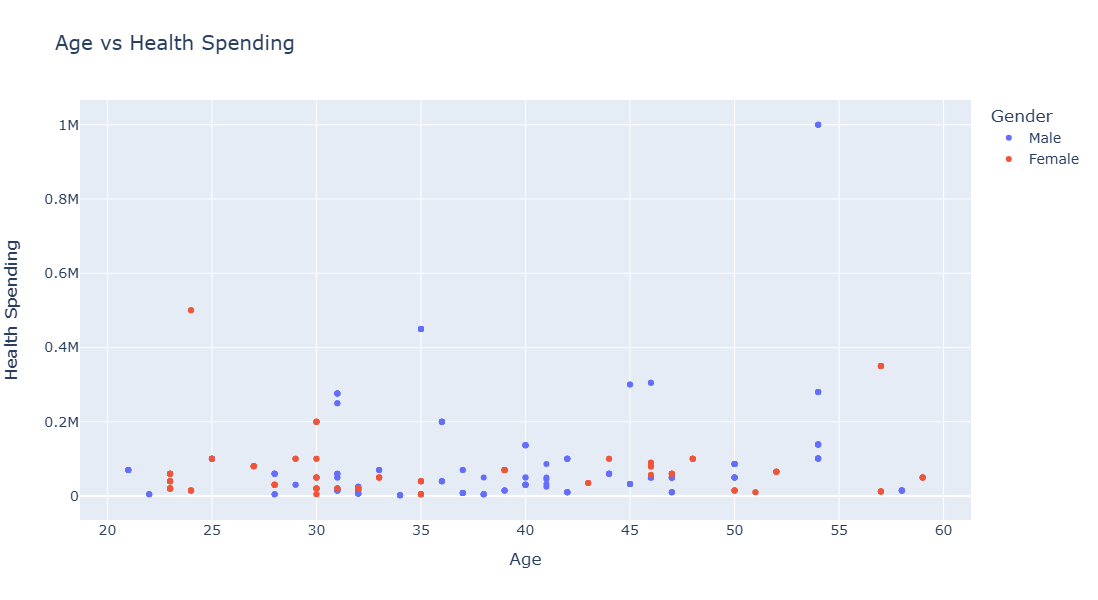

In [208]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Monkey-patch DataFrame to include iteritems if missing
if not hasattr(pd.DataFrame, 'iteritems'):
    def iteritems(self):
        return iter(self.items())
    pd.DataFrame.iteritems = iteritems

def clean_numeric(val):
    """Remove non-numeric characters and convert to float."""
    if pd.isna(val):
        return None
    num = re.sub(r'[^\d.]', '', str(val))
    try:
        return float(num)
    except:
        return None

# Load data from CSV file
file_path = r"C:\catastrophic.csv"
df = pd.read_csv(file_path)

# Clean and convert relevant columns
df["Household Income"] = df["Household Icome"].apply(clean_numeric)
df["Health Spending"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)
df["Last Admission Cost"] = df["Last Admission Cost?"].apply(clean_numeric)
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')

# Drop rows with missing or zero values in key numeric columns
df = df.dropna(subset=["Household Income", "Health Spending", "Age"])
df = df[(df["Household Income"] > 0) & (df["Health Spending"] > 0)]

# Standard layout parameters for readability
layout_params = dict(width=800, height=600, font=dict(size=14))

# 1. Frequency Plot: Frequency of Geo Zones
freq_geo = df["Geo Zone"].value_counts().reset_index()
freq_geo.columns = ["Geo Zone", "Count"]
fig_freq = px.bar(freq_geo, x="Geo Zone", y="Count", title="Frequency of Geo Zones")
fig_freq.update_layout(**layout_params)
fig_freq.show()

# 2. Boxplot: Distribution of Health Spending
fig_box = px.box(df, y="Health Spending", title="Boxplot of 6-Month Health Spending Estimate")
fig_box.update_layout(**layout_params)
fig_box.show()

# 3. Pie Chart: Gender Distribution
fig_pie = px.pie(df, names="Gender", title="Gender Distribution", width=800, height=600)
fig_pie.update_layout(font=dict(size=14))
fig_pie.show()

# 4. Bar Chart: Count by Health Facility Type
fac_counts = df["Health Facility Type"].value_counts().reset_index()
fac_counts.columns = ["Health Facility Type", "Count"]
fig_bar = px.bar(fac_counts, x="Health Facility Type", y="Count", title="Count by Health Facility Type")
fig_bar.update_layout(**layout_params)
fig_bar.show()

# 5. Line Graph: Health Spending by Age (sorted by Age)
df_sorted = df.sort_values("Age")
fig_line = px.line(df_sorted, x="Age", y="Health Spending", title="Health Spending by Age")
fig_line.update_layout(**layout_params)
fig_line.show()

# 6. Heat Map: Correlation Matrix of Numeric Variables
numeric_cols = ["Age", "Household Income", "Health Spending", "Last Admission Cost"]
corr_matrix = df[numeric_cols].corr()
fig_heat = px.imshow(corr_matrix, text_auto=True, title="Correlation Heatmap", width=800, height=600)
fig_heat.update_layout(font=dict(size=14))
fig_heat.show()

# 7. Individual Visualizations for Each Numeric Variable
numeric_df = df[numeric_cols].copy().reset_index(drop=True)
for col in numeric_cols:
    # a) Line Graph: Sorted values vs. index
    sorted_series = numeric_df[col].sort_values().reset_index(drop=True)
    fig_line_col = px.line(x=sorted_series.index, y=sorted_series,
                           title=f"Line Graph of {col}",
                           labels={"x": "Index (sorted)", "y": col})
    fig_line_col.update_layout(**layout_params)
    fig_line_col.show()
    
    # b) Histogram: Distribution of the variable
    fig_hist = px.histogram(numeric_df, x=col, nbins=30,
                            title=f"Histogram of {col}")
    fig_hist.update_layout(**layout_params)
    fig_hist.show()
    
    # c) Density Plot (Bell Shape): Using Plotly Figure Factory
    data_for_density = [numeric_df[col].dropna().values]
    fig_density = ff.create_distplot(data_for_density, group_labels=[col],
                                     show_hist=False, show_rug=False)
    fig_density.update_layout(title=f"Density Plot of {col}", **layout_params)
    fig_density.show()

# 8. Pair Plots: Scatter Matrix for Numeric Variables
# Create a new DataFrame for numeric columns to ensure compatibility
numeric_df_reset = pd.DataFrame(df[numeric_cols]).reset_index(drop=True)
fig_pair = px.scatter_matrix(numeric_df_reset, title="Pair Plot (Scatter Matrix) of Numeric Variables", width=900, height=700)
fig_pair.update_layout(font=dict(size=12))
fig_pair.show()

# 9. Scatter Plot: Age vs Health Spending colored by Gender
fig_scatter = px.scatter(df, x="Age", y="Health Spending", color="Gender", title="Age vs Health Spending")
fig_scatter.update_layout(**layout_params)
fig_scatter.show()

# Note: ROC Curve section is omitted as the dataset does not include an 'HIV Test Result' column.

# 1.	Catastrophic Expenditure Incidence Rate:
    (i) What: Percentage of households whose out-of-pocket health costs exceed a defined threshold (e.g., 40% of non-subsistence income, e.t.c).
    (ii) Why: Measures the overall burden of healthcare costs on households.


## Function to clean numeric values from strings (e.g., ">100,000" to 100000)

In [26]:
def clean_numeric(val):
    if pd.isna(val):
        return None
    num = re.sub(r'[^\d.]', '', str(val))
    return float(num) if num else None

## Clean and convert columns to numeric

In [31]:
df["Household Income"] = df["Household Icome"].apply(clean_numeric)
df["Health Expenditure"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)

## Define threshold as 40% of Household Income

In [34]:
df["Threshold"] = 0.4 * df["Household Income"]

## Flag households with health expenditure exceeding the threshold

In [37]:
df['Catastrophic'] = df["Health Expenditure"] > df["Threshold"]

## Calculate and print the incidence rate as a percentage

In [39]:
incidence_rate = df['Catastrophic'].mean() * 100
print(f"Catastrophic Expenditure Incidence Rate: {incidence_rate:.2f}%")

Catastrophic Expenditure Incidence Rate: 25.06%


## Alternative way to Calculate and print the incidence rate as a percentage

In [42]:
# Define threshold ratio (40% of household income)
threshold = 0.4 * df["Household Income"]

# Flag households exceeding the threshold
df['Catastrophic'] = df["Health Expenditure"] > threshold

# Calculate incidence rate as a percentage
incidence_rate = df['Catastrophic'].mean() * 100

print(f"Catastrophic Expenditure Incidence Rate: {incidence_rate:.2f}%")

Catastrophic Expenditure Incidence Rate: 25.06%


# 2. Calculate Out-of-Pocket (OOP) Expenditure Ratio:¶
    (i). What: Ratio of out-of-pocket health spending to total household income.
    (ii) Why: Indicates financial strain and helps compare across different income groups

In [54]:
df["OOP Ratio"] = df["Health Expenditure"] / df["Household Income"]

# Print summary statistics for the OOP Ratio
print("Out-of-Pocket Expenditure Ratio Summary:")
print(df["OOP Ratio"].describe())

# Optionally, display the average ratio as a percentage
average_ratio = df["OOP Ratio"].mean() * 100
print(f"Average OOP Expenditure Ratio: {average_ratio:.2f}%")

Out-of-Pocket Expenditure Ratio Summary:
count    4.030000e+02
mean     3.100073e-01
std      6.965129e-01
min      0.000000e+00
25%      6.199988e-07
50%      2.499938e-05
75%      4.250000e-01
max      5.000000e+00
Name: OOP Ratio, dtype: float64
Average OOP Expenditure Ratio: 31.00%


# 3.	Median Health Spending & Distribution Analysis:
        (i) What: Central tendency (median) and spread (variance, interquartile range) of health expenditures.
        (ii) Why: Provides a robust measure that is less skewed by outliers.


In [64]:
# Calculate central tendency and spread
median_expenditure = df["Health Expenditure"].median()
variance_expenditure = df["Health Expenditure"].var()
iqr_expenditure = df["Health Expenditure"].quantile(0.75) - df["Health Expenditure"].quantile(0.25)

print(f"Median Health Expenditure: {median_expenditure}")
print(f"Variance of Health Expenditure: {variance_expenditure}")
print(f"Interquartile Range (IQR): {iqr_expenditure}")

Median Health Expenditure: 40000.0
Variance of Health Expenditure: 14874810056.417664
Interquartile Range (IQR): 70000.0


# 4.	Household Income Segmentation:
    (i) What: Breakdown of income levels, possibly using clustering or segmentation analysis.
    (ii) Why: Identifies vulnerable sub-groups more likely to incur catastrophic expenses.


In [69]:
from sklearn.cluster import KMeans

In [71]:
# Clean and convert 'Household Icome' column to numeric values
df["Household Income"] = df["Household Icome"].apply(clean_numeric)

# Drop rows with missing income values
df = df.dropna(subset=["Household Income"])

# Prepare data for clustering (reshape to 2D array)
X = df[["Household Income"]].values

# Perform KMeans clustering with 3 clusters (adjust 'k' as needed)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df["Income Cluster"] = kmeans.fit_predict(X)

# Print cluster centers to see segmented income levels
print("Cluster Centers (Income Levels):")
print(kmeans.cluster_centers_)

# Count of households per cluster
cluster_counts = df["Income Cluster"].value_counts().sort_index()
print("\nHousehold Count per Income Cluster:")
print(cluster_counts)

# Descriptive statistics for each cluster
for i in range(k):
    stats = df[df["Income Cluster"] == i]["Household Income"].describe()
    print(f"\nCluster {i} Statistics:")
    print(stats)

Cluster Centers (Income Levels):
[[2.00005000e+09]
 [5.00001000e+10]
 [8.75647668e+04]]

Household Count per Income Cluster:
Income Cluster
0     74
1    136
2    193
Name: count, dtype: int64

Cluster 0 Statistics:
count    7.400000e+01
mean     2.000050e+09
std      0.000000e+00
min      2.000050e+09
25%      2.000050e+09
50%      2.000050e+09
75%      2.000050e+09
max      2.000050e+09
Name: Household Income, dtype: float64

Cluster 1 Statistics:
count    1.360000e+02
mean     5.000010e+10
std      0.000000e+00
min      5.000010e+10
25%      5.000010e+10
50%      5.000010e+10
75%      5.000010e+10
max      5.000010e+10
Name: Household Income, dtype: float64

Cluster 2 Statistics:
count       193.000000
mean      87564.766839
std       29061.307360
min       20000.000000
25%      100000.000000
50%      100000.000000
75%      100000.000000
max      100000.000000
Name: Household Income, dtype: float64


# 5. Calculate Correlation & Regression Diagnostics (e.g., VIF, p-values):
    (i) What: Statistical tests to identify key drivers (age, insurance, distance) of expenditure.
    (ii) Why: Diagnoses relationships and potential multicollinearity among predictors


In [74]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
# Clean and convert relevant columns
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df["Health Expenditure"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)
df["Distance"] = df["Ditance to Facility ()"].apply(clean_numeric)

# Encode 'Health Insurance Status' as binary: 'Insured' -> 1, others -> 0.
df["Insurance"] = df["Health Insurance Status"].apply(lambda x: 1 if isinstance(x, str) and x.strip().lower() == "insured" else 0)

# Drop rows with missing values in key predictors or target
df_model = df.dropna(subset=["Health Expenditure", "Age", "Distance", "Insurance"])

# Define predictors (Age, Distance, Insurance) and target (Health Expenditure)
X = df_model[["Age", "Distance", "Insurance"]]
y = df_model["Health Expenditure"]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Compute Variance Inflation Factors (VIF)
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print("\nVariance Inflation Factors:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:     Health Expenditure   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     9.279
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           6.05e-06
Time:                        09:57:44   Log-Likelihood:                -5277.5
No. Observations:                 403   AIC:                         1.056e+04
Df Residuals:                     399   BIC:                         1.058e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.231e+04   2.33e+04      1.386      0.1

# Predictive Metrics & Models

# 6.	Risk Score/Probability of Catastrophic Spending:
    (i) What: A predictive risk score derived from logistic regression or machine learning models.
    (ii) Why: Identifies households at high risk, enabling targeted interventions


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [89]:
def clean_numeric(val):
    """Remove non-numeric characters and convert to float."""
    if pd.isna(val):
        return None
    num = re.sub(r'[^\d.]', '', str(val))
    return float(num) if num else None

In [91]:
# Clean and convert numeric columns
df["Household Income"] = df["Household Icome"].apply(clean_numeric)
df["Health Expenditure"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')

# Define catastrophic spending: Health Expenditure > 40% of Household Income
df["Catastrophic"] = (df["Health Expenditure"] > 0.4 * df["Household Income"]).astype(int)

# Prepare data for modeling (drop rows with missing predictors/target)
df_model = df.dropna(subset=["Catastrophic", "Age", "Household Income"])

# Define predictors and target (using Age and Household Income as predictors)
X = df_model[["Age", "Household Income"]]
y = df_model["Catastrophic"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict risk scores (probabilities) on test set
y_pred_proba = lr.predict_proba(X_test)[:, 1]
df_model.loc[X_test.index, "Risk Score"] = y_pred_proba

# Output sample risk scores and performance metric
print("Predicted Risk Scores for Catastrophic Spending:")
print(df_model[["Age", "Household Income", "Risk Score"]].head())

auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {auc:.2f}")

Predicted Risk Scores for Catastrophic Spending:
   Age  Household Income  Risk Score
0   37      1.000000e+05    0.467708
1   36      2.000050e+09         NaN
2   42      1.000000e+05         NaN
3   32      5.000010e+10         NaN
4   47      5.000010e+10         NaN
ROC AUC Score: 0.92


# 7.	Predictive Model Performance Metrics (AUC, Accuracy):
    (i) What: Metrics (Area Under Curve, accuracy, precision, recall) for evaluating model performance.
    (ii) Why: Ensures reliability of the predictive models used for risk estimation


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

In [96]:
# Define target: Catastrophic spending if Health Expenditure > 40% of Household Income
df["Catastrophic"] = (df["Health Expenditure"] > 0.4 * df["Household Income"]).astype(int)

# Drop rows with missing key values
df_model = df.dropna(subset=["Catastrophic", "Age", "Household Income"])

# Define predictors and target variable
X = df_model[["Age", "Household Income"]]
y = df_model["Catastrophic"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Generate predictions and probabilities
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute performance metrics
auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"ROC AUC: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Model Performance Metrics:
ROC AUC: 0.92
Accuracy: 0.77
Precision: 0.62
Recall: 0.24


# 8.	Elasticity Analysis:
    (i) What: Measures how sensitive health spending is to changes in income or other factors.
    (ii) Why: Helps forecast the impact of economic shifts on expenditure


In [113]:
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm

def clean_numeric(val):
    """Remove non-numeric characters and convert to float."""
    if pd.isna(val):
        return None
    num = re.sub(r'[^\d.]', '', str(val))
    return float(num) if num else None

# Load data from CSV
df = pd.read_csv(r"C:\catastrophic.csv")

# Clean and convert relevant columns
df["Household Income"] = df["Household Icome"].apply(clean_numeric)
df["Health Expenditure"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)

# Drop rows with missing values in key columns
df = df.dropna(subset=["Household Income", "Health Expenditure"])

# Remove rows with zero values since log(0) is undefined
df = df[(df["Household Income"] > 0) & (df["Health Expenditure"] > 0)]

# Compute log transformations for elasticity analysis
df["log_income"] = np.log(df["Household Income"])
df["log_expenditure"] = np.log(df["Health Expenditure"])

# Prepare the regression model (log-log model)
X = sm.add_constant(df["log_income"])
y = df["log_expenditure"]

# Fit the OLS regression model
model = sm.OLS(y, X).fit()
print(model.summary())

# Elasticity is given by the coefficient on log_income
elasticity = model.params["log_income"]
print(f"Elasticity of Health Expenditure with respect to Household Income: {elasticity:.2f}")

                            OLS Regression Results                            
Dep. Variable:        log_expenditure   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     14.26
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           0.000187
Time:                        10:12:28   Log-Likelihood:                -541.74
No. Observations:                 344   AIC:                             1087.
Df Residuals:                     342   BIC:                             1095.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9802      0.195     51.302      0.0

# 9.	Time Series Forecasting (RMSE, MAPE):
    (i) What: Forecasting future trends in health spending using ARIMA or Prophet models.
    (ii) Why: Supports resource planning and anticipates future expenditure patterns.


In [118]:
pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/f8/8f/9cff125e50b56e29e7e05776dc74e56fc70b79830f0b85e947e5be831e96/holidays-0.67-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/a4/ed/1f1afb2e9e7f38a545d628f864d562a5ae64fe6f7a10e28ffb9b185b4e89/importlib_resources-6.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

In [128]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import re

def clean_numeric(val):
    """Remove non-numeric characters and convert to float."""
    if pd.isna(val):
        return None
    num = re.sub(r'[^\d.]', '', str(val))
    try:
        return float(num)
    except:
        return None

# Load data from CSV
df = pd.read_csv(r"C:\catastrophic.csv")

# Clean and convert '6-Month Health Spending Estimate' column to numeric
df["Health Spending"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)

# Use an existing 'Date' column if present; otherwise, create one with month-end frequency
if "Date" not in df.columns:
    df["Date"] = pd.date_range(start='2022-01-01', periods=len(df), freq='ME')
else:
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

# Drop rows with missing or zero values in key columns
df = df.dropna(subset=["Date", "Health Spending"])
df = df[df["Health Spending"] > 0]

# Prepare data for Prophet: rename columns to 'ds' and 'y'
df_prophet = df[["Date", "Health Spending"]].rename(columns={"Date": "ds", "Health Spending": "y"})
df_prophet = df_prophet.sort_values("ds").reset_index(drop=True)

# Check if there are enough data points for forecasting
if len(df_prophet) < 10:
    print("Not enough data for reliable forecasting.")
else:
    # Split data: 80% for training, 20% for testing
    split_index = int(0.8 * len(df_prophet))
    train_df = df_prophet.iloc[:split_index].copy()
    test_df = df_prophet.iloc[split_index:].copy()

    # Fit Prophet model on training data
    model = Prophet()
    model.fit(train_df)

    # Create a future DataFrame using the exact dates from the test set
    future = test_df[['ds']].copy()
    forecast = model.predict(future)

    # Align forecast with actual test data
    forecast = forecast.set_index('ds')
    test_actual = test_df.set_index('ds')['y']
    y_pred = forecast['yhat'].loc[test_actual.index]

    # Calculate performance metrics
    rmse = np.sqrt(mean_squared_error(test_actual, y_pred))
    mape = mean_absolute_percentage_error(test_actual, y_pred) * 100

    print("Forecast Evaluation:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

10:24:20 - cmdstanpy - INFO - Chain [1] start processing
10:24:21 - cmdstanpy - INFO - Chain [1] done processing


Forecast Evaluation:
RMSE: 94944.67
MAPE: 415.50%


# 10.	Regression Coefficients & Effect Sizes:
    (i) What: Quantitative estimates from multivariate models showing the impact of predictors on spending.
    (ii) Why: Identifies which factors most strongly influence financial burden.


In [133]:
# Clean and convert relevant columns
df["Household Income"] = df["Household Icome"].apply(clean_numeric)
df["Health Spending"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')

# Drop rows with missing or zero values
df = df.dropna(subset=["Household Income", "Health Spending", "Age"])
df = df[(df["Household Income"] > 0) & (df["Health Spending"] > 0)]

# Define predictors and target variable
X = df[["Age", "Household Income"]]
y = df["Health Spending"]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()
print("OLS Regression Results:")
print(model.summary())

# Calculate standardized coefficients (effect sizes)
# Standardize predictors and target
X_std = (X - X.mean()) / X.std()
y_std = (y - y.mean()) / y.std()
X_std = sm.add_constant(X_std.drop(columns='const'), has_constant='add')  # re-add constant if needed

# Fit model on standardized data
model_std = sm.OLS(y_std, X_std).fit()
print("\nStandardized Coefficients (Effect Sizes):")
print(model_std.params)

OLS Regression Results:
                            OLS Regression Results                            
Dep. Variable:        Health Spending   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     9.939
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           6.38e-05
Time:                        10:27:27   Log-Likelihood:                -4523.0
No. Observations:                 344   AIC:                             9052.
Df Residuals:                     341   BIC:                             9063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const           

# Prescriptive Analytics

# 11.	Policy Impact Simulation:
    (i) What: Simulation models (e.g., Monte Carlo, decision trees) to test how different interventions (improved insurance coverage, subsidies) might lower catastrophic spending.
    (ii) Why: Provides actionable recommendations for policy changes


In [137]:
# Clean and convert relevant columns
df["Household Income"] = df["Household Icome"].apply(clean_numeric)
df["Health Spending"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)

# Drop rows with missing or zero values in key columns
df = df.dropna(subset=["Household Income", "Health Spending"])
df = df[(df["Household Income"] > 0) & (df["Health Spending"] > 0)]

# Baseline: Define catastrophic spending as spending > 40% of income
df["Catastrophic"] = (df["Health Spending"] > 0.4 * df["Household Income"]).astype(int)
baseline_incidence = df["Catastrophic"].mean()
print(f"Baseline Catastrophic Incidence Rate: {baseline_incidence*100:.2f}%")

def simulate_policy(df, spending_reduction=0.0, income_increase=0.0):
    """
    Simulates a policy intervention by reducing health spending and/or increasing household income.
    
    Parameters:
      spending_reduction (float): Fractional reduction in health spending (e.g., 0.2 for 20% reduction).
      income_increase (float): Fractional increase in household income (e.g., 0.1 for 10% increase).
    
    Returns:
      float: Simulated catastrophic spending incidence rate.
    """
    df_sim = df.copy()
    df_sim["Adjusted Spending"] = df_sim["Health Spending"] * (1 - spending_reduction)
    df_sim["Adjusted Income"] = df_sim["Household Income"] * (1 + income_increase)
    df_sim["Catastrophic_Sim"] = (df_sim["Adjusted Spending"] > 0.4 * df_sim["Adjusted Income"]).astype(int)
    return df_sim["Catastrophic_Sim"].mean()

# Define intervention parameters: 20% spending reduction and 10% income increase
spending_reduction_rate = 0.2  # improved insurance/subsidies reduce out-of-pocket spending by 20%
income_increase_rate = 0.1     # subsidies or income support increases income by 10%

# Run simulation
simulated_incidence = simulate_policy(df, spending_reduction=spending_reduction_rate, income_increase=income_increase_rate)
print(f"Simulated Catastrophic Incidence Rate: {simulated_incidence*100:.2f}%")

Baseline Catastrophic Incidence Rate: 29.36%
Simulated Catastrophic Incidence Rate: 21.80%


# 12.	Cost-Benefit Analysis:
    (i) What: Evaluation of potential interventions’ costs versus their expected benefits.
    (ii) Why: Guides investment decisions in health financing and support programs


In [146]:
import pandas as pd
import re

# Load data from CSV using the provided file path
file_path = r"C:\catastrophic.csv"
df = pd.read_csv(file_path)

# Print available columns to verify structure
print("Available columns:", df.columns.tolist())

# Define the required columns for cost-benefit analysis using available data
required_cols = ["Last Admission Cost?", "6-Month Health Spending Estimate"]

# Check that all required columns exist
for col in required_cols:
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in the dataset. Please verify your CSV file.")

# Function to clean and convert string values to numeric
def clean_numeric(val):
    if pd.isna(val):
        return None
    num = re.sub(r'[^\d.]', '', str(val))
    try:
        return float(num)
    except:
        return None

# Clean and convert the columns to numeric values
df["Cost"] = df["Last Admission Cost?"].apply(clean_numeric)
df["Expected Benefit"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)

# Drop rows with missing or zero values in these columns
df = df.dropna(subset=["Cost", "Expected Benefit"])
df = df[(df["Cost"] > 0) & (df["Expected Benefit"] > 0)]

# Calculate Net Benefit (Expected Benefit minus Cost)
df["Net Benefit"] = df["Expected Benefit"] - df["Cost"]

# Calculate Benefit-Cost Ratio (Expected Benefit divided by Cost)
df["Benefit-Cost Ratio"] = df["Expected Benefit"] / df["Cost"]

# Display the cost-benefit analysis summary
summary_cols = ["Last Admission Cost?", "6-Month Health Spending Estimate", "Net Benefit", "Benefit-Cost Ratio"]
print("Cost-Benefit Analysis Summary:")
print(df[summary_cols])

Available columns: ['Age', 'Gender', 'Marital Status', 'Education Level', 'Employment Status', 'Religion', 'Ethnic Group', 'Geo Zone', 'Children in Household?', 'Older Person in Household?', 'Use Insecticide Net?', 'Residence Type', 'Household Head Gender', 'Household Head Age', 'Household Head Education', 'Household Head Employment', 'Household Head Marital Status', 'Household Icome', 'Health Facility Type', 'Access to Govt Healthcare?', 'Can Afford Govt Healthcare?', 'Can Afford Private Healthcare?', 'Health Cost Bearer', 'Ditance to Facility ()', 'Distance as Barrier?', 'Hospitalization Length as Barrier?', 'Health Insurance Status', 'Illness Type in Household', 'Recent Hospitalization?', 'Unpaid Medical Bills?', 'Mothly Health Spedig', 'Financial Decline from Bills?', 'Bills Affect Living Standard?', 'Sold Property for Bills?', 'Went Hungry for Bills?', 'Took Loan for Bills?', 'Poor Govt Services Increase Costs?', 'Private Facilities Overcharge?', 'Chronic Diseases Raise Costs?', '

In [151]:
import pandas as pd
import re

def clean_numeric(val):
    """
    Remove non-numeric characters from a value and convert it to float.
    """
    if pd.isna(val):
        return None
    # Remove any character that is not a digit or a period.
    num = re.sub(r'[^\d.]', '', str(val))
    try:
        return float(num)
    except:
        return None

# Load the CSV file
file_path = r"C:\catastrophic.csv"
df = pd.read_csv(file_path)

# Print available columns to verify structure
print("Available columns:", df.columns.tolist())

# Use 'Last Admission Cost?' as cost and '6-Month Health Spending Estimate' as expected benefit
df["Cost"] = df["Last Admission Cost?"].apply(clean_numeric)
df["Expected Benefit"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)

# Drop rows with missing or zero values in these columns (since log(0) and division by zero are undefined)
df = df.dropna(subset=["Cost", "Expected Benefit"])
df = df[(df["Cost"] > 0) & (df["Expected Benefit"] > 0)]

# Calculate Net Benefit (Expected Benefit minus Cost)
df["Net Benefit"] = df["Expected Benefit"] - df["Cost"]

# Calculate Benefit-Cost Ratio (Expected Benefit divided by Cost)
df["Benefit-Cost Ratio"] = df["Expected Benefit"] / df["Cost"]

# Display a summary of the cost-benefit analysis
summary_columns = ["Cost", "Expected Benefit", "Net Benefit", "Benefit-Cost Ratio"]
print("Cost-Benefit Analysis Summary:")
print(df[summary_columns].describe())

Available columns: ['Age', 'Gender', 'Marital Status', 'Education Level', 'Employment Status', 'Religion', 'Ethnic Group', 'Geo Zone', 'Children in Household?', 'Older Person in Household?', 'Use Insecticide Net?', 'Residence Type', 'Household Head Gender', 'Household Head Age', 'Household Head Education', 'Household Head Employment', 'Household Head Marital Status', 'Household Icome', 'Health Facility Type', 'Access to Govt Healthcare?', 'Can Afford Govt Healthcare?', 'Can Afford Private Healthcare?', 'Health Cost Bearer', 'Ditance to Facility ()', 'Distance as Barrier?', 'Hospitalization Length as Barrier?', 'Health Insurance Status', 'Illness Type in Household', 'Recent Hospitalization?', 'Unpaid Medical Bills?', 'Mothly Health Spedig', 'Financial Decline from Bills?', 'Bills Affect Living Standard?', 'Sold Property for Bills?', 'Went Hungry for Bills?', 'Took Loan for Bills?', 'Poor Govt Services Increase Costs?', 'Private Facilities Overcharge?', 'Chronic Diseases Raise Costs?', '

# 13.	Sensitivity Analysis:
    (i) What: Testing how variations in key parameters (income levels, distance to facility) affect spending outcomes.
    (ii) Why: Assesses the robustness of predictive models and informs risk management strategies.


                            OLS Regression Results                            
Dep. Variable:        Health Spending   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6.845
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           0.000172
Time:                        10:46:57   Log-Likelihood:                -4522.6
No. Observations:                 344   AIC:                             9053.
Df Residuals:                     340   BIC:                             9069.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.827e+04   2.67e+04  

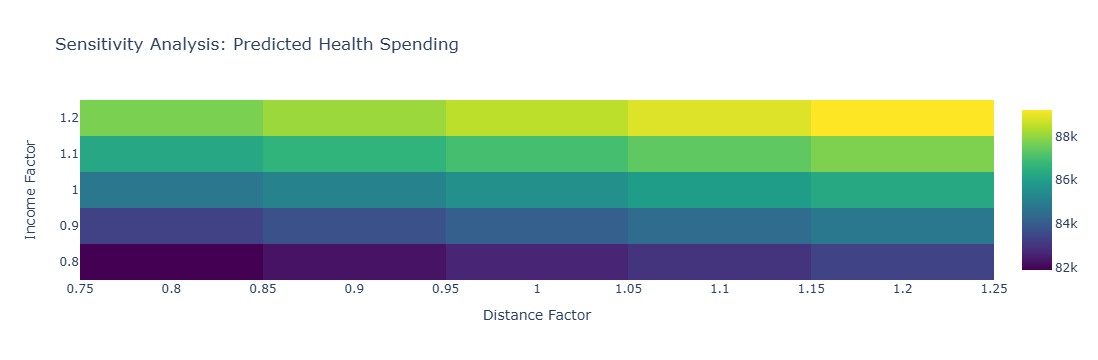

In [157]:
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import plotly.graph_objects as go

def clean_numeric(val):
    """Remove non-numeric characters and convert to float."""
    if pd.isna(val):
        return None
    num = re.sub(r'[^\d.]', '', str(val))
    try:
        return float(num)
    except:
        return None

# Load data from CSV
df = pd.read_csv(r"C:\catastrophic.csv")

# Clean and convert key columns
df["Household Income"] = df["Household Icome"].apply(clean_numeric)
df["Health Spending"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)
df["Distance"] = df["Ditance to Facility ()"].apply(clean_numeric)

# Drop rows with missing or zero values in key columns
df = df.dropna(subset=["Household Income", "Health Spending", "Distance"])
df = df[(df["Household Income"] > 0) & (df["Health Spending"] > 0) & (df["Distance"] > 0)]

# Optionally include Age if available
if "Age" in df.columns:
    df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
    df = df.dropna(subset=["Age"])
    predictors = ["Household Income", "Distance", "Age"]
else:
    predictors = ["Household Income", "Distance"]

X = df[predictors]
y = df["Health Spending"]

# Add constant for intercept and fit the regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# Use baseline as the mean of predictors
baseline = {col: X[col].mean() for col in predictors}
baseline_const = 1  # constant term

print("Baseline predictor means:")
print(baseline)

# Define variation factors for sensitivity analysis (80% to 120%)
income_factors = np.linspace(0.8, 1.2, 5)
distance_factors = np.linspace(0.8, 1.2, 5)

sensitivity_results = []

for inc_factor in income_factors:
    for dist_factor in distance_factors:
        new_income = baseline["Household Income"] * inc_factor
        new_distance = baseline["Distance"] * dist_factor
        new_age = baseline.get("Age", None)
        
        # Construct new observation vector based on predictors order
        new_obs = [baseline_const, new_income, new_distance]
        if new_age is not None:
            new_obs.append(new_age)
        
        # Predict health spending using regression coefficients
        pred_spending = np.dot(model.params, new_obs)
        sensitivity_results.append({
            "Income Factor": inc_factor,
            "Distance Factor": dist_factor,
            "Predicted Spending": pred_spending
        })

# Convert results to DataFrame and display
sensitivity_df = pd.DataFrame(sensitivity_results)
print(sensitivity_df)

# Pivot the results for heatmap plotting using keyword arguments
heatmap_data = sensitivity_df.pivot(index="Income Factor", columns="Distance Factor", values="Predicted Spending")

# Create a heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=heatmap_data.columns,
    y=heatmap_data.index,
    colorscale='Viridis'
))
fig.update_layout(
    title="Sensitivity Analysis: Predicted Health Spending",
    xaxis_title="Distance Factor",
    yaxis_title="Income Factor"
)
fig.show()

# 14.	Clustering Analysis for Segmentation:
    (i) What: Use methods like K-means to group households by similar characteristics and expenditure patterns.
    (ii) Why: Allows for targeted strategies and tailored interventions based on household profiles.


In [160]:
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

def clean_numeric(val):
    """Remove non-numeric characters and convert to float."""
    if pd.isna(val):
        return None
    num = re.sub(r'[^\d.]', '', str(val))
    try:
        return float(num)
    except:
        return None

# Load data from CSV
df = pd.read_csv(r"C:\catastrophic.csv")

# Clean and convert columns
df["Household Income"] = df["Household Icome"].apply(clean_numeric)
df["Health Spending"] = df["6-Month Health Spending Estimate"].apply(clean_numeric)
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')

# Drop rows with missing or zero values in key columns
df_clust = df.dropna(subset=["Household Income", "Health Spending", "Age"])
df_clust = df_clust[(df_clust["Household Income"] > 0) & (df_clust["Health Spending"] > 0)]

# Prepare features: Household Income, Health Spending, Age
X = df_clust[["Household Income", "Health Spending", "Age"]].values

# Standardize the data for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering (choose k=3 as an example; adjust as needed)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_clust["Cluster"] = kmeans.fit_predict(X_scaled)

# Transform cluster centers back to original scale
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

print("Cluster Centers (Original Scale):")
print(cluster_centers)

# Count of households per cluster
cluster_counts = df_clust["Cluster"].value_counts().sort_index()
print("\nHousehold Count per Cluster:")
print(cluster_counts)

# Display descriptive statistics for each cluster
for i in range(k):
    stats = df_clust[df_clust["Cluster"] == i][["Household Income", "Health Spending", "Age"]].describe()
    print(f"\nCluster {i} Statistics:")
    print(stats)

Cluster Centers (Original Scale):
[[2.20841219e+09 1.23979167e+05 4.91562500e+01]
 [5.97091045e+08 5.71044776e+04 3.16194030e+01]
 [5.00001000e+10 8.66403509e+04 3.66315789e+01]]

Household Count per Cluster:
Cluster
0     96
1    134
2    114
Name: count, dtype: int64

Cluster 0 Statistics:
       Household Income  Health Spending        Age
count      9.600000e+01        96.000000  96.000000
mean       2.208412e+09    123979.166667  49.156250
std        8.678974e+09    183567.797839   5.347558
min        2.000000e+04     10000.000000  40.000000
25%        1.000000e+05     50000.000000  46.000000
50%        1.000000e+05     65000.000000  48.000000
75%        2.000050e+09    101000.000000  54.000000
max        5.000010e+10   1000000.000000  58.000000

Cluster 1 Statistics:
       Household Income  Health Spending         Age
count      1.340000e+02       134.000000  134.000000
mean       5.970910e+08     57104.477612   31.619403
std        9.186236e+08     74058.021214    5.768458
min 

# 15.	Interactive Dashboard Metrics (Drill-Down Capabilities):
    (i) What: Dynamic, interactive visualizations that allow users to filter by region, facility type, insurance status, etc.
    (ii) Why: Empowers stakeholders to explore data in depth and make informed, real time decisions.


In [167]:
!pip install dash pandas plotly jupyter-dash

In [216]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load data from CSV
df = pd.read_csv(r"C:\catastrophic.csv")

# Create Dash app
app = dash.Dash(__name__)

# Define layout with dropdown filters and graphs
app.layout = html.Div([
    html.H1("Catastrophic Health & Facility Distribution"),
    
    html.Div([
        html.Label("Select Region (Geo Zone):"),
        dcc.Dropdown(
            id='region-dropdown',
            options=[{'label': region, 'value': region} for region in sorted(df['Geo Zone'].dropna().unique())],
            multi=True,
            value=[]
        )
    ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
    
    html.Div([
        html.Label("Select Facility Type:"),
        dcc.Dropdown(
            id='facility-dropdown',
            options=[{'label': fac, 'value': fac} for fac in sorted(df['Health Facility Type'].dropna().unique())],
            multi=True,
            value=[]
        )
    ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
    
    html.Div([
        html.Label("Select Insurance Status:"),
        dcc.Dropdown(
            id='insurance-dropdown',
            options=[{'label': ins, 'value': ins} for ins in sorted(df['Health Insurance Status'].dropna().unique())],
            multi=True,
            value=[]
        )
    ], style={'width': '30%', 'display': 'inline-block', 'padding': '10px'}),
    
    dcc.Graph(id='bar-chart'),
    dcc.Graph(id='pie-chart')
], style={'backgroundColor': '#e0f7fa', 'padding': '20px'})

# Callback to update graphs based on filters
@app.callback(
    [Output('bar-chart', 'figure'),
     Output('pie-chart', 'figure')],
    [Input('region-dropdown', 'value'),
     Input('facility-dropdown', 'value'),
     Input('insurance-dropdown', 'value')]
)
def update_charts(selected_regions, selected_facilities, selected_insurance):
    # Filter data based on dropdown selections
    filtered_df = df.copy()
    if selected_regions:
        filtered_df = filtered_df[filtered_df['Geo Zone'].isin(selected_regions)]
    if selected_facilities:
        filtered_df = filtered_df[filtered_df['Health Facility Type'].isin(selected_facilities)]
    if selected_insurance:
        filtered_df = filtered_df[filtered_df['Health Insurance Status'].isin(selected_insurance)]
    
    # Group data for the bar chart: Count by Geo Zone, Education Level, and Employment Status
    grouped = (filtered_df.groupby(["Geo Zone", "Education Level", "Employment Status"])
                             .size()
                             .reset_index(name="Count"))
    
    # Create a grouped bar chart with facets for Employment Status and colored by Education Level.
    fig_bar = px.bar(grouped, 
                     x='Geo Zone', 
                     y='Count', 
                     color='Education Level',
                     text='Count',
                     facet_row="Employment Status",
                     title="Household Count by Region with Education & Employment Status",
                     labels={'Geo Zone': 'Region', 'Count': 'Household Count'})
    
    # Show count values on each bar and adjust layout for better readability.
    fig_bar.update_traces(texttemplate='%{text}', textposition='outside')
    fig_bar.update_layout(
        uniformtext_minsize=12,
        uniformtext_mode='hide',
        width=900,
        height=900,
        font=dict(size=14),
        legend_title_text='Education Level'
    )
    # Clean facet annotations to show only the facet value
    fig_bar.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
    
    # Pie chart: Distribution by Facility Type
    fig_pie = px.pie(filtered_df, names='Health Facility Type', 
                     title="Distribution by Facility Type",
                     color_discrete_sequence=px.colors.sequential.Viridis)
    fig_pie.update_layout(width=800, height=600, font=dict(size=14))
    
    return fig_bar, fig_pie

if __name__ == '__main__':
    app.run_server(debug=True)